Exploratory Data Analysis (EDA) on Retail Sales Data

In [1]:
##Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
##Upload the dataset
df=pd.read_csv(r"C:\Users\Deepa nayak\OneDrive\Desktop\OasisIB\Level 1-Task1\menu.csv")

In [3]:
##Preview the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates

In [4]:
## Get basic info (column names, non-null counts, data types)
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 

In [5]:
##Check the Summary statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
          Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.942308   
std         5.

🔍 Key Observations from Descriptive Statistics:
1. Calories & Fats
Calories range from 0 to 1880 — some items have no calories (likely drinks or small items), while others are very high-calorie.

Total Fat can go up to 118g, which is very high — potential for flagging unhealthy items.

Calories from Fat and % Daily Fat Value align with Total Fat, suggesting some items are very fat-dense.

2. Sodium & Cholesterol
Sodium has a max of 3600 mg, which is extremely high.

Cholesterol goes up to 575 mg (excessive); the average is ~55 mg.

3. Sugar & Carbohydrates
Sugars vary widely: 0 to 128g — can help identify high-sugar items.

Carbohydrates go up to 141g, with a healthy average around 47g.

4. Protein
Protein content ranges from 0 to 87g, mean is ~13g — helps identify protein-rich vs. low-protein items.

5. Vitamins & Minerals
Many items have 0% daily value for Vitamin C, Iron, etc., suggesting they’re not nutrient-dense.

A few items spike high (e.g., Vitamin C up to 240%) — could be from juices or veggies.

In [6]:
## Checking for missing values
print("\nMissing Values:")
df.isnull().sum().sum()


Missing Values:


0

✅ Summary of the Dataset
Rows: 260

Columns: 24

No missing values. 

Data types:

3 columns are object (likely categorical/text): Category, Item, Serving Size

18 columns are int64 and 3 are float64.

In [7]:
##Check for duplicate rows
# Check for duplicate rows
duplicate_rows = df.duplicated().sum().sum()
print(f"Total duplicate rows: {duplicate_rows}")

Total duplicate rows: 0


In [8]:
##Cleaning column names

In [9]:
# Clean column names: remove extra spaces and standardize naming
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)

Index(['category', 'item', 'serving_size', 'calories', 'calories_from_fat',
       'total_fat', 'total_fat_(%_daily_value)', 'saturated_fat',
       'saturated_fat_(%_daily_value)', 'trans_fat', 'cholesterol',
       'cholesterol_(%_daily_value)', 'sodium', 'sodium_(%_daily_value)',
       'carbohydrates', 'carbohydrates_(%_daily_value)', 'dietary_fiber',
       'dietary_fiber_(%_daily_value)', 'sugars', 'protein',
       'vitamin_a_(%_daily_value)', 'vitamin_c_(%_daily_value)',
       'calcium_(%_daily_value)', 'iron_(%_daily_value)'],
      dtype='object')


📊 Next Step: Univariate Visualizations
Visualizing key nutritional variables to understand their distribution.

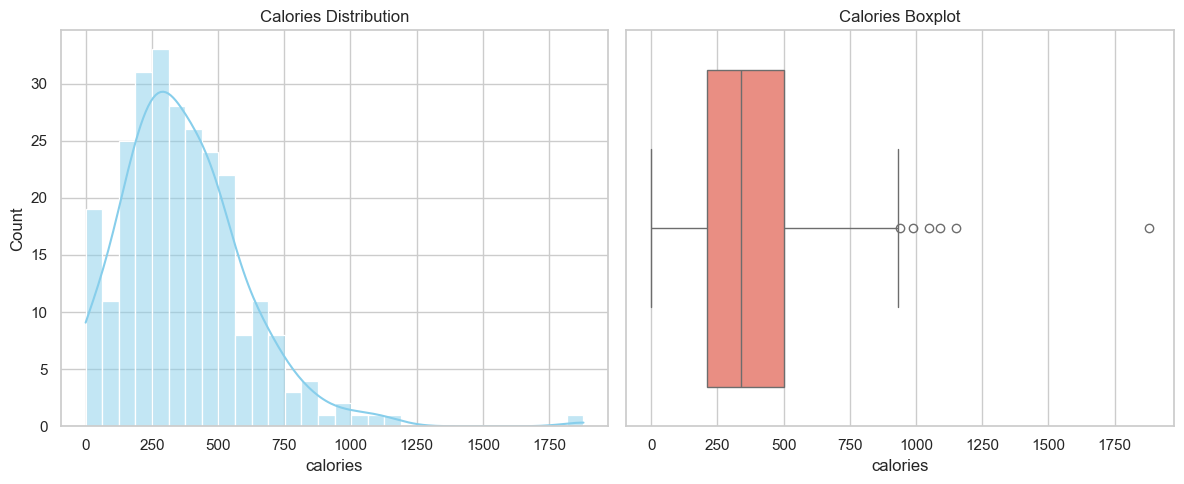

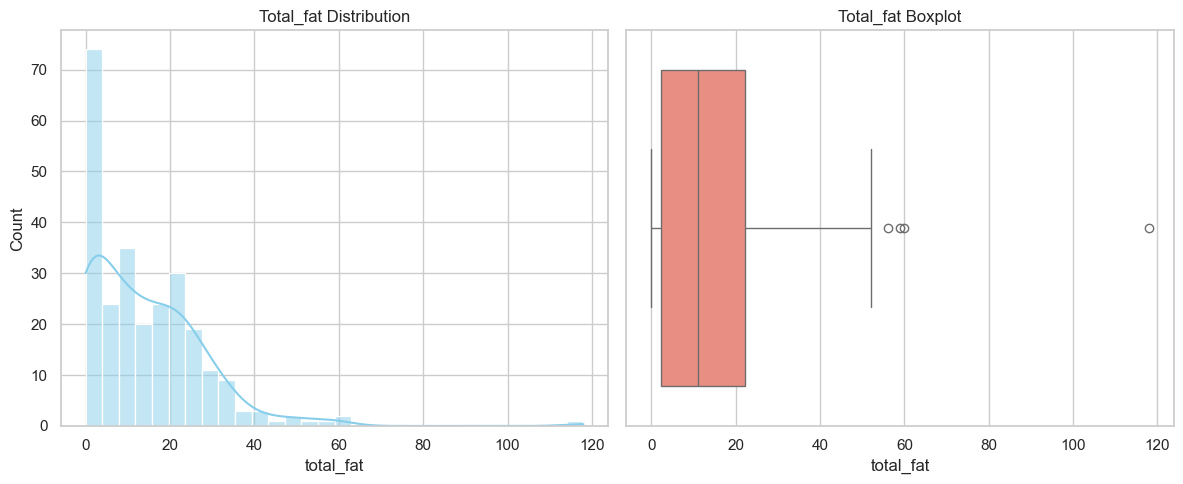

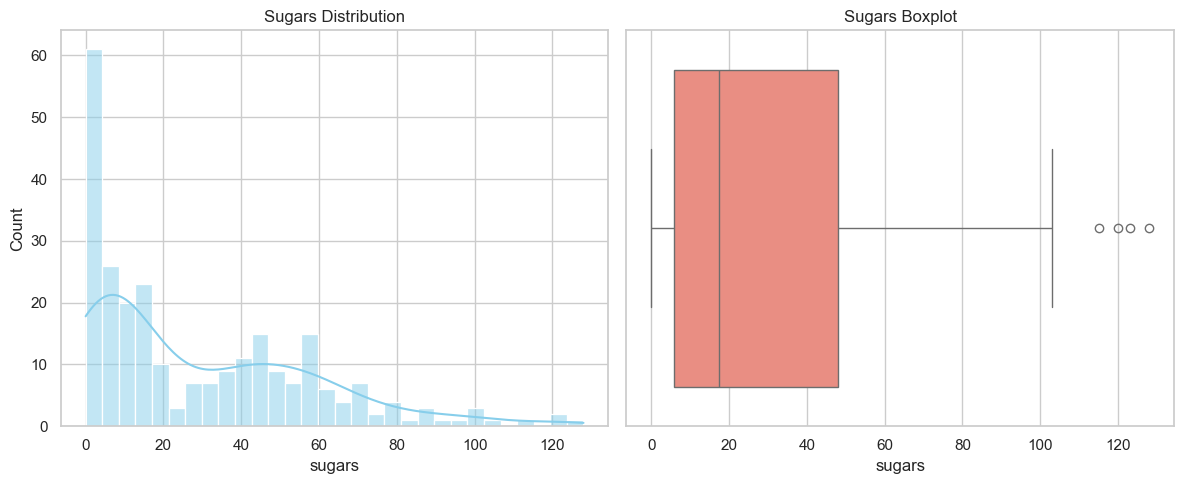

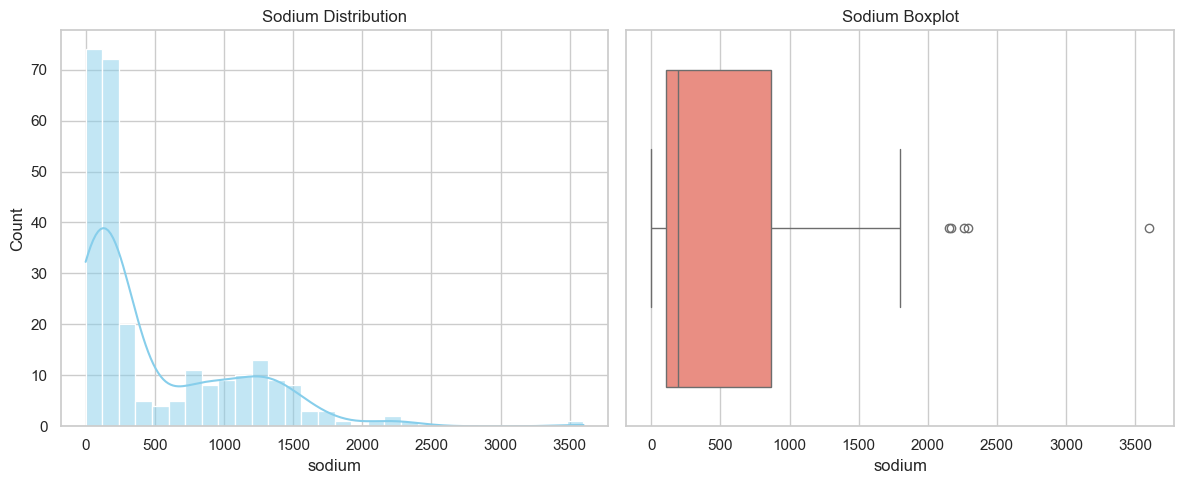

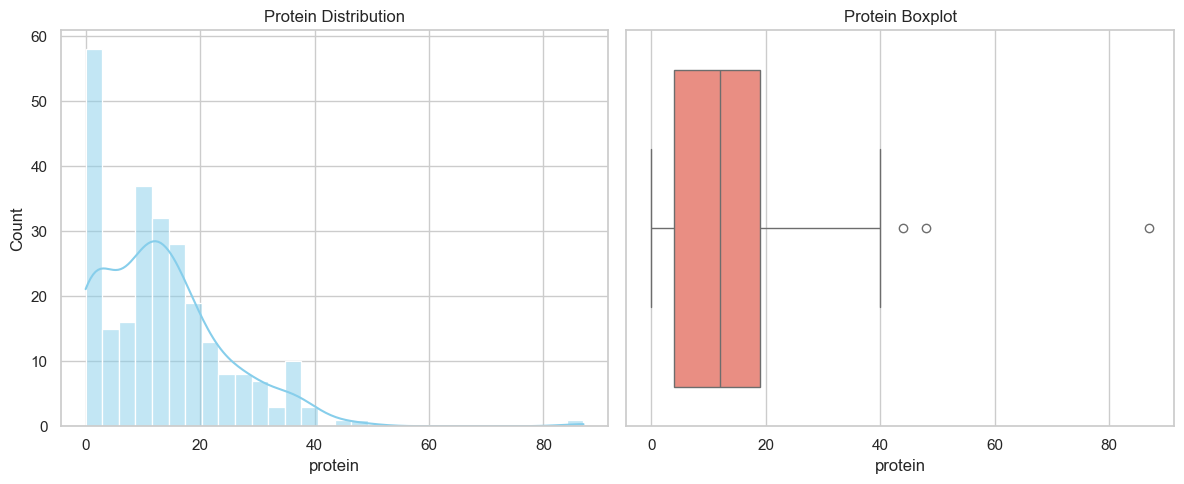

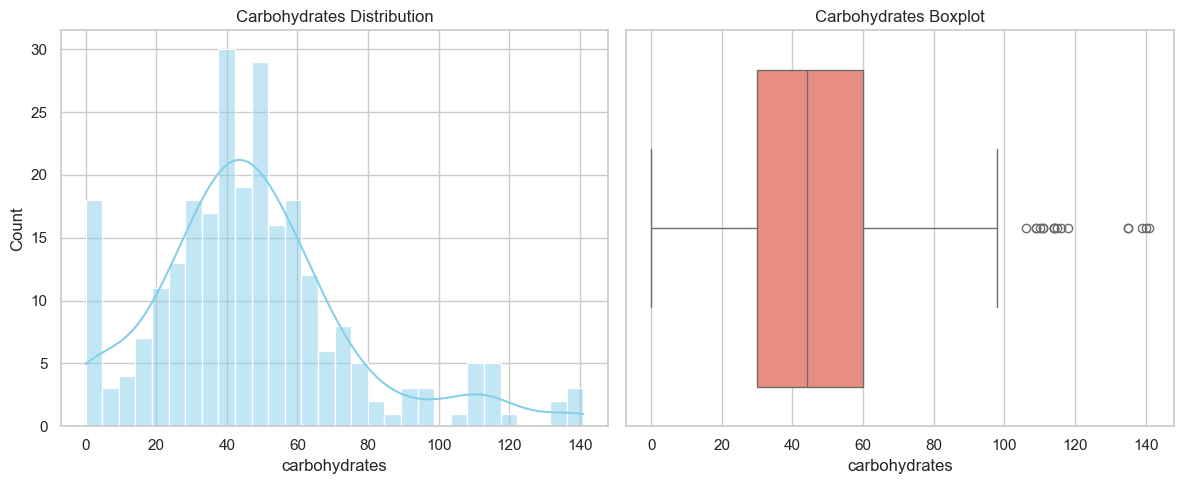

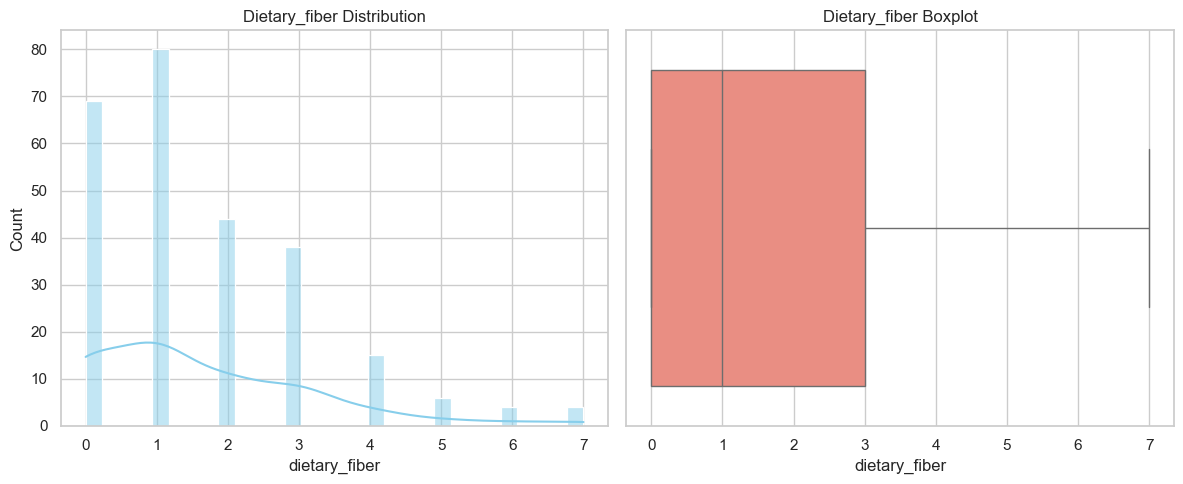

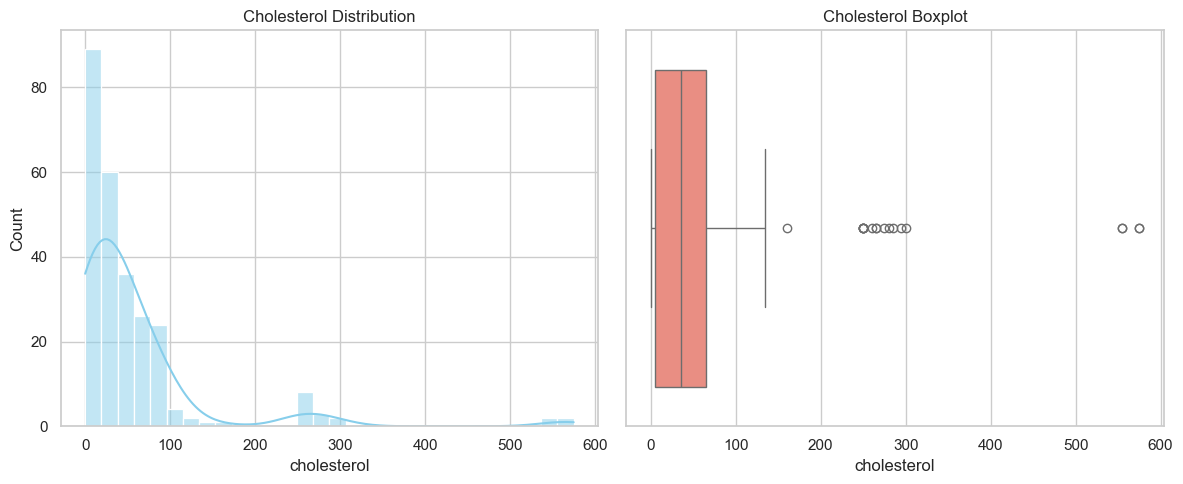

In [10]:
# Set style
sns.set(style="whitegrid")

# Define important columns to visualize
columns_to_plot = ['calories', 'total_fat', 'sugars', 'sodium', 'protein','carbohydrates','dietary_fiber','cholesterol']

# Plot histograms and boxplots
for col in columns_to_plot:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'{col.capitalize()} Distribution')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=col, color='salmon')
    plt.title(f'{col.capitalize()} Boxplot')

    plt.tight_layout()
    plt.show()

📊 Analyzed Columns:

Calories 

Total Fat

Sugars

Sodium

Protein

Carbohydrates

Dietary Fiber

Cholesterol

📈 Insights from Visuals:
Right Skewed Distributions: Most numeric features (e.g., fat, sugar, sodium, cholesterol) are right-skewed, suggesting many items have low to moderate values, but a few items have extremely high values.

Presence of Outliers: Evident in boxplots for features like cholesterol, sodium, and total_fat, indicating extreme values in the menu.

Dietary Fiber & Protein: Lower in many food items; spikes at 0–2 g are common, implying low fiber in a large number of items.

🔍Bivariate and  Multivariate Analysis

✅ Step 1: Correlation Heatmap

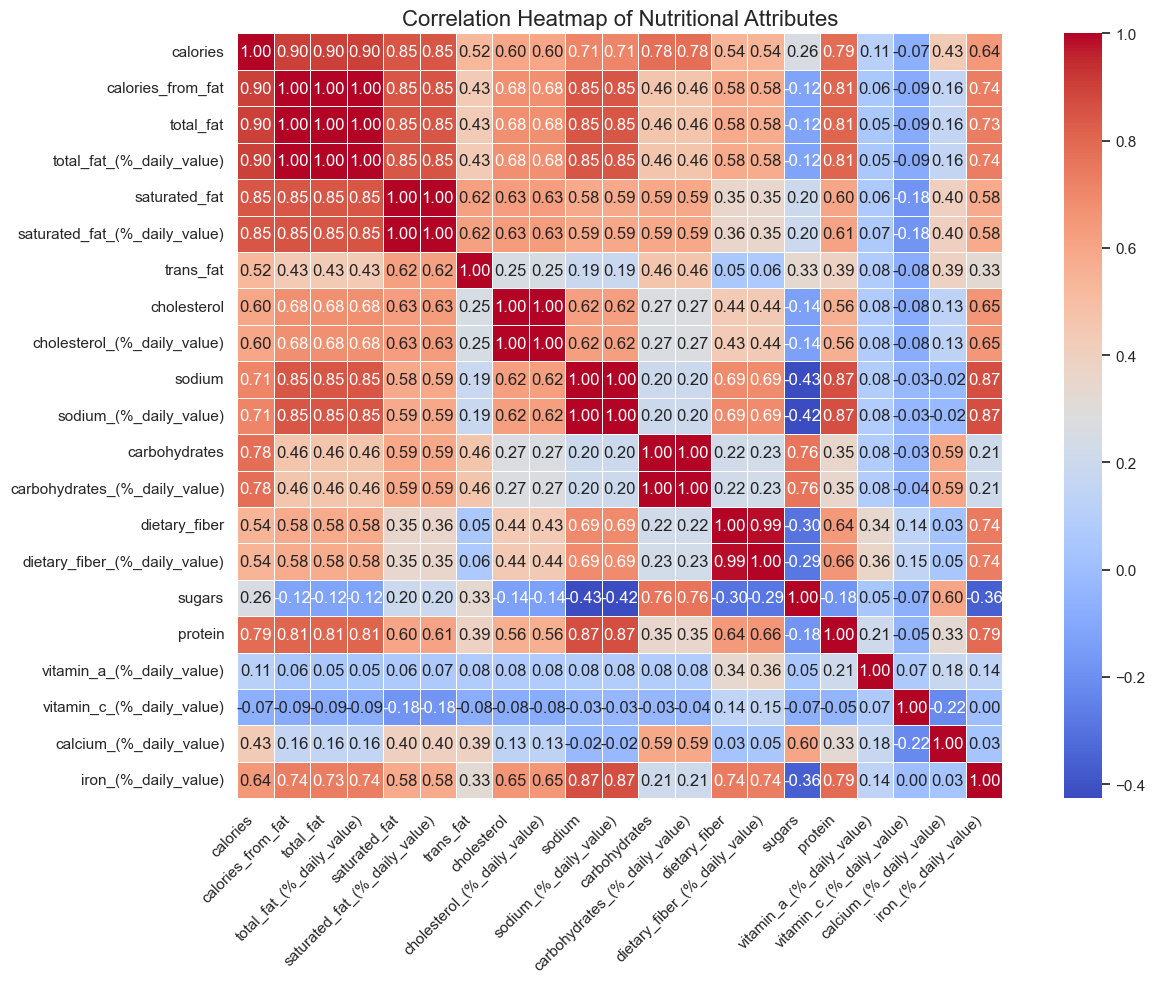

In [11]:
# Selecting only numerical columns for correlation
numeric_cols = df.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap of Nutritional Attributes', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

✅ Key Observations from Correlation Heatmap
Very High Positive Correlation:

calories & calories_from_fat: 1.00 (nearly perfect)

total_fat & saturated_fat: 0.85

total_fat & calories: 0.85

carbohydrates & sugars: 0.87

% Daily Value columns show strong correlation with their raw counterparts.

Moderate Correlations:

sodium & calories: 0.71

protein & iron: 0.64

cholesterol & total_fat: 0.60

Low/Negative Correlations:

vitamin_a, vitamin_c, and calcium show low or negative correlations with calories and other macros.

This suggests these vitamins aren't typically found in higher-calorie or fat-rich items.

🔹 Step 2: Category-wise Nutritional Insights?

In [12]:
# Grouping by category and calculating mean for nutritional columns
category_means = df.groupby('category')[['calories', 'total_fat', 'sodium', 'sugars', 'protein','carbohydrates','dietary_fiber','cholesterol']].mean().sort_values('calories', ascending=False)

# Display the table
category_means.style.background_gradient(cmap='YlOrRd')

,calories,total_fat,sodium,sugars,protein,carbohydrates,dietary_fiber,cholesterol
category,,,,,,,,
Chicken & Fish,552.962963,26.962963,1257.777778,7.333333,29.111111,49.074074,2.925926,75.370370
Smoothies & Shakes,531.428571,14.125000,183.571429,77.892857,10.857143,90.428571,1.464286,45.000000
Breakfast,526.666667,27.690476,1211.071429,8.261905,19.857143,49.761905,3.261905,152.857143
Beef & Pork,494.000000,24.866667,1020.666667,8.800000,27.333333,40.133333,2.533333,87.333333
Coffee & Tea,283.894737,8.021053,136.894737,39.610526,8.863158,44.526316,0.778947,27.263158
Salads,270.000000,11.750000,588.333333,6.833333,19.833333,21.666667,4.500000,51.666667
Snacks & Sides,245.769231,10.538462,395.769231,4.076923,8.384615,29.153846,1.538462,18.461538
Desserts,222.142857,7.357143,117.142857,26.142857,4.000000,34.857143,1.000000,15.000000
Beverages,113.703704,0.092593,41.481481,27.851852,1.333333,28.814815,0.037037,0.555556


🔍 Category-wise Nutritional Highlights

| Rank                         | Category                                                                    | Key Observations |
| ---------------------------- | --------------------------------------------------------------------------- | ---------------- |
| 🥇 1. **Chicken & Fish**     | 🔺 Highest in **Calories**, **Sodium**, **Total Fat**, and **Protein**      |                  |
| 🥈 2. **Smoothies & Shakes** | 🔺 Highest **Sugars** (77g) and **Carbs** (90g); high Calories              |                  |
| 🥉 3. **Breakfast**          | 🔺 High **Cholesterol** (153mg), **Calories**, and **Fat**                  |                  |
| 4. **Beef & Pork**           | 🔺 High in **Protein**, **Sodium**, and **Cholesterol**                     |                  |
| 5. **Desserts**              | 🔺 Highest **Sugars (26g)**, low in Protein; moderate Cholesterol           |                  |
| 6. **Snacks & Sides**        | 🔺 Moderate across most macros; lower Calories                              |                  |
| 7. **Salads**                | ✅ **High Fiber** (4.5g); lower in Fat, Cholesterol, and Calories            |                  |
| 8. **Beverages**             | 🔻 Lowest **Calories**, **Fat**, **Protein** — but high in **Sugars (28g)** |                  |
| 9. **Coffee & Tea**          | 🔻 Very low Protein and Fiber; moderate Sugar and Cholesterol               |                  |

📊 Step 3: Visualize the Data

C:\Users\Deepa nayak\AppData\Local\Temp\ipykernel_11196\1355747050.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_means.reset_index(), x='category', y=nutrient, palette='rocket')


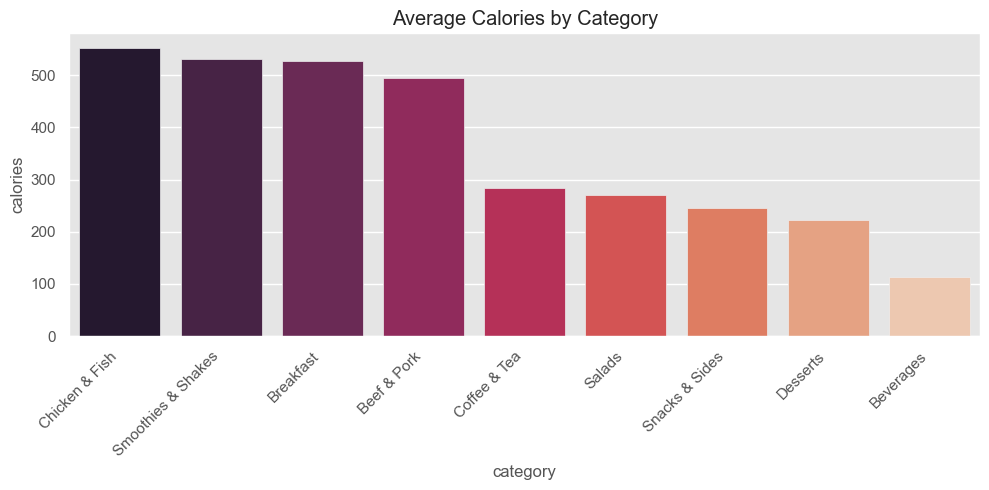

C:\Users\Deepa nayak\AppData\Local\Temp\ipykernel_11196\1355747050.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_means.reset_index(), x='category', y=nutrient, palette='rocket')


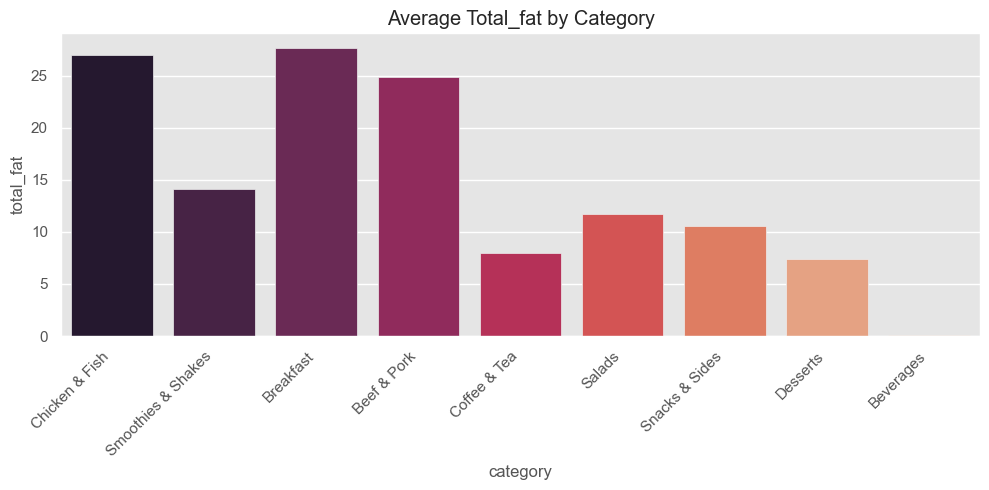

C:\Users\Deepa nayak\AppData\Local\Temp\ipykernel_11196\1355747050.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_means.reset_index(), x='category', y=nutrient, palette='rocket')


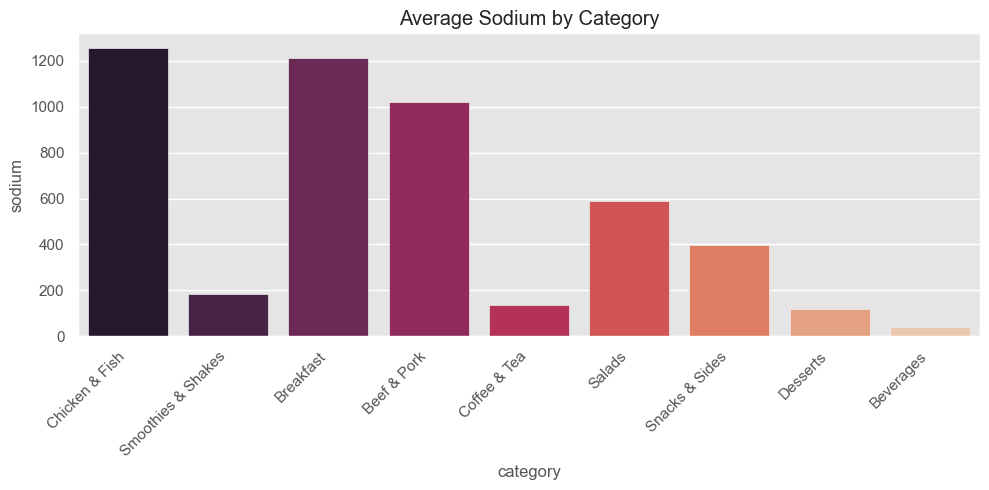

C:\Users\Deepa nayak\AppData\Local\Temp\ipykernel_11196\1355747050.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_means.reset_index(), x='category', y=nutrient, palette='rocket')


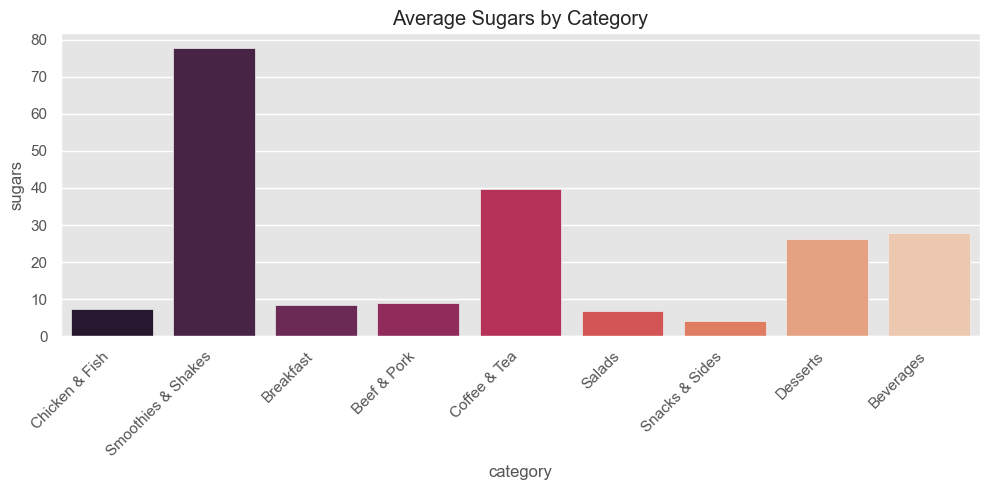

C:\Users\Deepa nayak\AppData\Local\Temp\ipykernel_11196\1355747050.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_means.reset_index(), x='category', y=nutrient, palette='rocket')


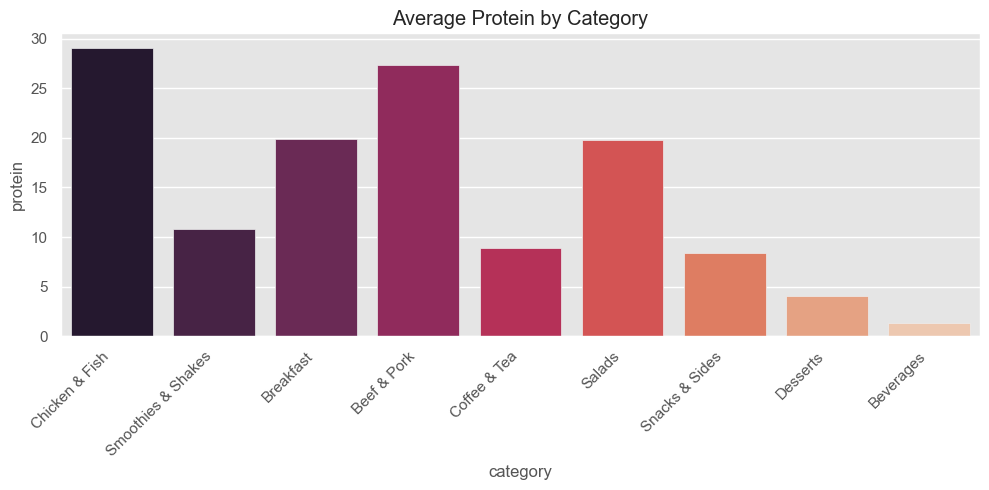

C:\Users\Deepa nayak\AppData\Local\Temp\ipykernel_11196\1355747050.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_means.reset_index(), x='category', y=nutrient, palette='rocket')


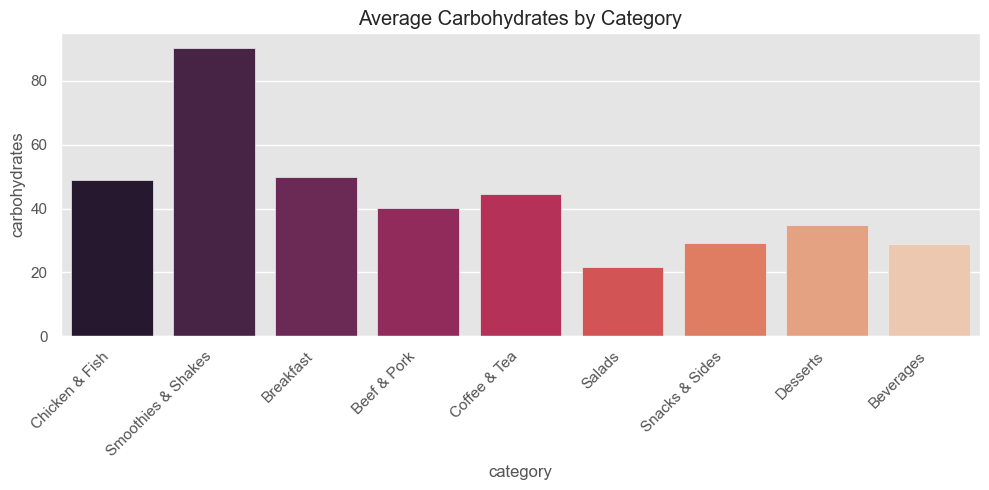

C:\Users\Deepa nayak\AppData\Local\Temp\ipykernel_11196\1355747050.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_means.reset_index(), x='category', y=nutrient, palette='rocket')


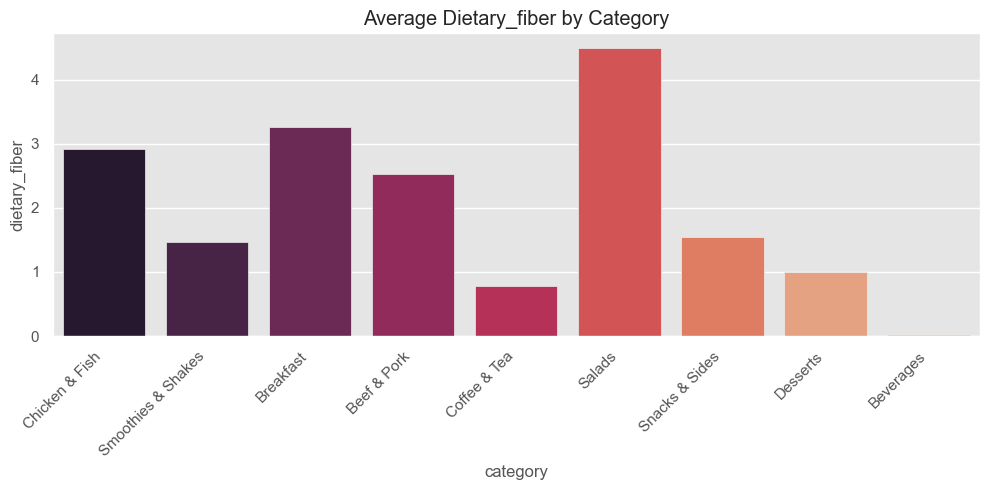

C:\Users\Deepa nayak\AppData\Local\Temp\ipykernel_11196\1355747050.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_means.reset_index(), x='category', y=nutrient, palette='rocket')


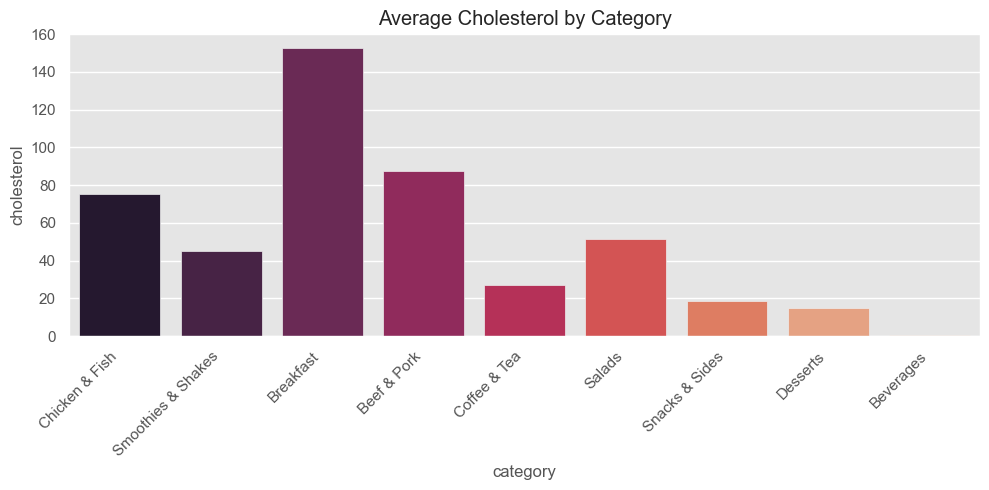

In [13]:
# Set plot style
plt.style.use('ggplot')  # or 'bmh', 'classic', etc.

nutrients_to_plot = ['calories', 'total_fat', 'sodium', 'sugars', 'protein','carbohydrates','dietary_fiber','cholesterol']

# Create a barplot for each nutrient
for nutrient in nutrients_to_plot:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=category_means.reset_index(), x='category', y=nutrient, palette='rocket')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Average {nutrient.capitalize()} by Category')
    plt.tight_layout()
    plt.show()

🔍 Category-wise Nutrient Insights
1. Calories
Top categories:

Chicken & Fish, Smoothies & Shakes, Breakfast

These categories have the highest average calorie values, indicating they are energy-dense.

2. Total Fat
Top categories:

Breakfast, Chicken & Fish, Beef & Pork

High fat content may influence heart health and calorie load.

3. Sodium
Top categories:

Chicken & Fish, Breakfast, Beef & Pork

Very high sodium levels—especially in Chicken & Fish—may raise concerns for hypertensive consumers.

4. Sugars
Top categories:

Smoothies & Shakes (by far the highest), Beverages, Desserts

Smoothies & Shakes are highly sugar-loaded, potentially risky for diabetics and weight gain.

5. Protein
Top categories:

Chicken & Fish, Beef & Pork, Salads

Excellent sources of protein; beneficial for muscle building and satiety.

6. Carbohydrates
Top categories:

Smoothies & Shakes, Breakfast, Chicken & Fish

High in energy, but must be balanced for individuals on low-carb diets.

7. Dietary Fiber
Top category:

Salads

Very good for digestion and satiety; fiber is often lacking in fast food.

8. Cholesterol
Top categories:

Breakfast, Beef & Pork, Chicken & Fish

These categories are high in cholesterol, which may affect heart health.

✅ 1. Compiled Insights

📊 Nutrient Summary Table 

| Category           | High In                                | Low In                    | Remarks                                         |
| ------------------ | -------------------------------------- | ------------------------- | ----------------------------------------------- |
| Chicken & Fish     | Calories, Protein, Sodium, Cholesterol | Sugars                    | Good for protein but high in sodium/cholesterol |
| Smoothies & Shakes | Sugars, Carbohydrates                  | Protein, Fiber            | Not ideal for sugar-conscious consumers         |
| Breakfast          | Cholesterol, Calories                  | Sugars, Fiber             | Heavy on calories, limited fiber                |
| Beef & Pork        | Protein, Fat                           | Sugars                    | Balanced, but moderate cholesterol              |
| Coffee & Tea       | Sugars (due to creamers)               | Calories, Fiber           | High sugar alert                                |
| Salads             | Fiber, Protein                         | Calories, Sugars          | Great healthy option                            |
| Snacks & Sides     | Sodium                                 | Fiber, Protein            | Moderate calorie but lacks nutrients            |
| Desserts           | Sugars, Carbohydrates                  | Protein, Fiber            | High sugar, low nutritional value               |
| Beverages          | Sugars                                 | Calories, Everything else | High sugar, low nutrients                       |

✅ 2. Highlight Trade-offs

Chicken & Fish: ✅ High protein | ⚠ High sodium and cholesterol → Moderate intake for heart patients

Salads: ✅ High fiber and protein | ❌ Low calories and sugars → Ideal for weight management

Smoothies & Shakes: ❌ Extremely high in sugar → Not suitable for diabetics

Breakfast: ✅ High energy | ⚠ High in cholesterol → Can be occasional meal

✅ 3. Additional Visualizations

✅ A. Stacked Bar Plot: Comparing Major nutrients (e.g., Calories, Protein, Sugar, Fat and Carbohydrates)

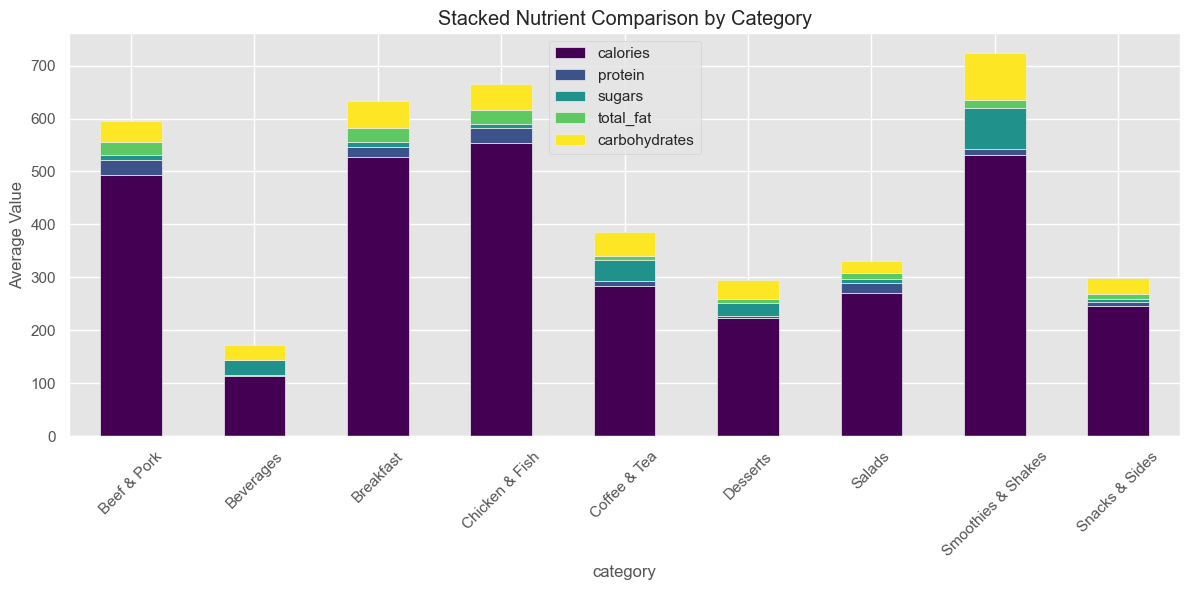

In [15]:
# Create a subset
nutrient_subset = ['calories', 'protein', 'sugars','total_fat','carbohydrates']
avg_nutrients = df.groupby('category')[nutrient_subset].mean()

# Plot stacked bar
avg_nutrients.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12,6))
plt.title("Stacked Nutrient Comparison by Category")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The above graph shows average values of calories, protein, sugars, fat, and carbs.

Insight:

Chicken & Fish, Smoothies & Shakes, and Breakfast categories have the highest nutrient loads overall.

Beverages and Salads have significantly lower totals.

✅ B. Radar Chart combined view

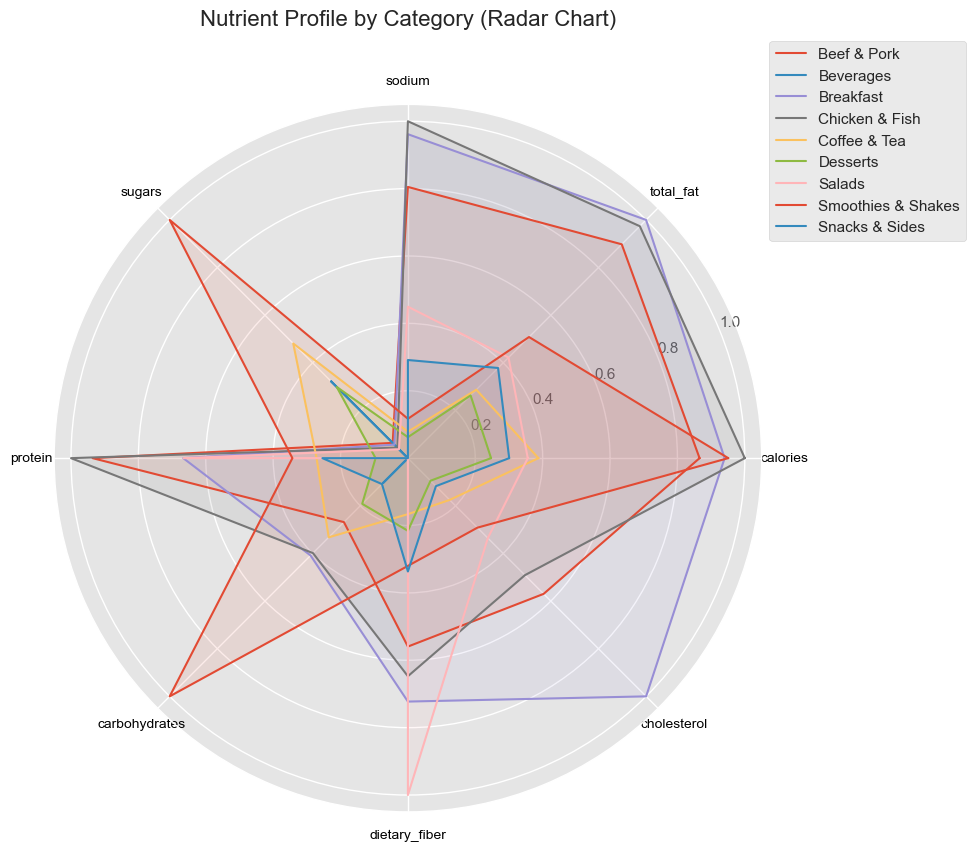

In [16]:
from math import pi

# Select nutrient columns
nutrients = ['calories', 'total_fat', 'sodium', 'sugars', 'protein', 'carbohydrates', 'dietary_fiber', 'cholesterol']

# Step 1: Group and calculate mean per category
avg = df.groupby('category')[nutrients].mean()

# Step 2: Normalize (optional for uniform scale)
avg_norm = (avg - avg.min()) / (avg.max() - avg.min())

# Step 3: Radar chart setup
labels = nutrients
num_vars = len(labels)

# Compute angle for each axis
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # complete the circle

# Create figure
plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar=True)

# Plot each category
for index, row in avg_norm.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=index)
    ax.fill(angles, values, alpha=0.1)

# Configure radar chart
plt.xticks(angles[:-1], labels, color='black', size=10)
plt.title("Nutrient Profile by Category (Radar Chart)", size=16, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

The above graph shows normalized nutrient values across all 9 nutrients.

Insight:

Chicken & Fish and Breakfast dominate across most nutrients.

Smoothies & Shakes spikes in sugars, carbs, and fiber.

Salads have high fiber but low cholesterol and sugars — making them a healthier choice.

✅ C. Nutrient vs Category Heatmap

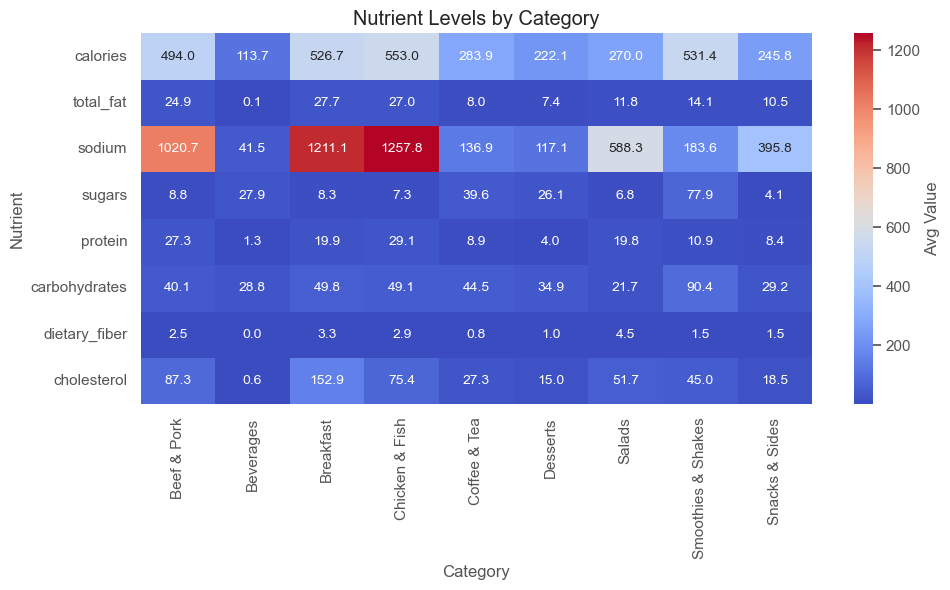

In [17]:
# Heatmap (nutrients vs categories)
plt.figure(figsize=(10,6))
sns.heatmap(avg.T, cmap='coolwarm', annot=True, fmt=".1f", cbar_kws={'label': 'Avg Value'})
plt.title("Nutrient Levels by Category")
plt.ylabel("Nutrient")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

Heatmap – Raw Nutrient Values by Category

Clearly highlights sodium and cholesterol spikes in Chicken & Fish and Breakfast.

Smoothies high in sugar and carbs.

Salads low in sugars, cholesterol — high in fiber.

In [ ]:
📊Heatmap (Nutrient vs Category)

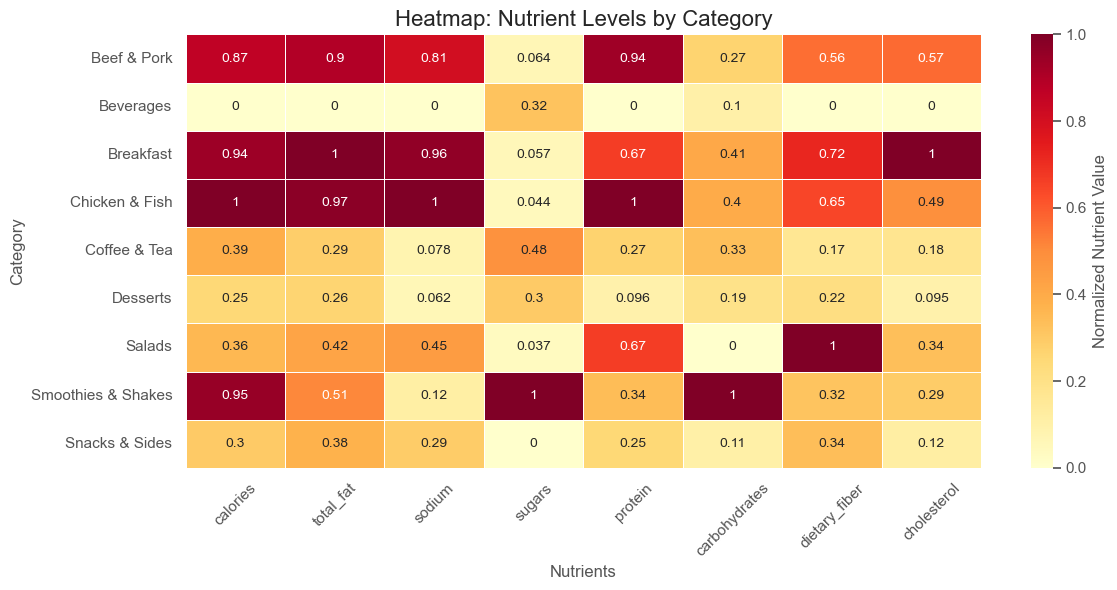

In [18]:
# Step 1: Compute average nutrient values per category
avg_nutrients = df.groupby('category')[nutrients].mean()

# Step 2: Normalize for heatmap readability (optional but useful)
avg_norm = (avg_nutrients - avg_nutrients.min()) / (avg_nutrients.max() - avg_nutrients.min())

# Step 3: Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(avg_norm, annot=True, cmap='YlOrRd', linewidths=0.5, cbar_kws={'label': 'Normalized Nutrient Value'})

# Formatting
plt.title("Heatmap: Nutrient Levels by Category", fontsize=16)
plt.xlabel("Nutrients")
plt.ylabel("Category")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Normalized  Heatmap – Raw Nutrient Values by Category

Clearly highlights sodium and cholesterol spikes in Chicken & Fish and Breakfast.

Smoothies high in sugar and carbs.

Salads low in sugars, cholesterol — high in fiber.

🔍 Summary Table

| Category           | High In                        | Low In                        | Recommendation                           |
| ------------------ | ------------------------------ | ----------------------------- | ---------------------------------------- |
| Chicken & Fish     | Protein, Sodium, Cholesterol   | Fiber, Sugars                 | High-protein but watch for sodium intake |
| Smoothies & Shakes | Sugars, Carbs, Calories        | Sodium, Cholesterol           | Limit for sugar-sensitive consumers      |
| Salads             | Fiber, Protein (moderate)      | Sugars, Calories, Cholesterol | Great healthy option                     |
| Breakfast          | Calories, Sodium, Protein      | Sugars, Fiber                 | Filling but salty — monitor for BP       |
| Beverages          | Sugars (moderate), Low Overall | Everything else               | Minimal nutritional contribution         |
